In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydata=pd.read_csv('Iris.csv')

In [3]:
mydata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


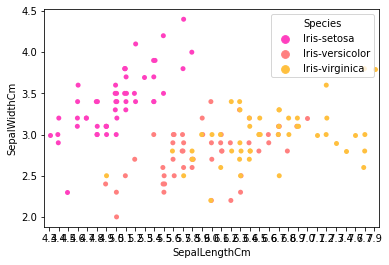

In [4]:
sns.stripplot(x="SepalLengthCm",y="SepalWidthCm",data=mydata,palette="spring",hue="Species")

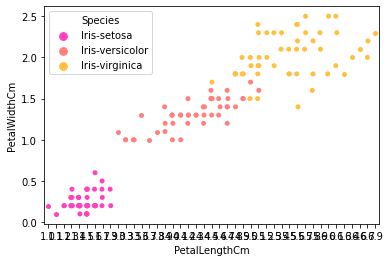

In [5]:
sns.stripplot(x="PetalLengthCm",y="PetalWidthCm",data=mydata,palette="spring",hue="Species")

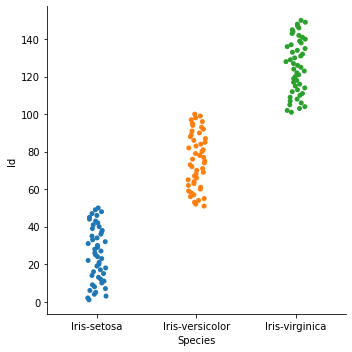

In [6]:
sns.catplot(data=mydata, y="Id",x="Species");

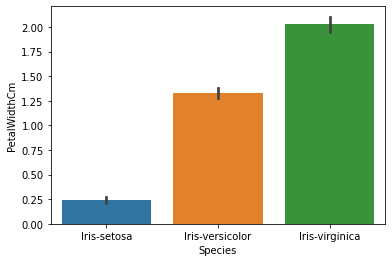

In [7]:
sns.barplot(data=mydata, y="PetalWidthCm",x="Species");

#Removing dependent for clustering

In [26]:
X_ind=mydata.drop(["Species"],axis=1)

# Cluster

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans_cluster=KMeans(2)

In [30]:
kmeans_cluster.fit(X_ind)

KMeans(n_clusters=2)

In [34]:
my_cluster=X_ind.copy()

In [35]:
my_cluster["km_group"]=kmeans_cluster.predict(my_cluster)

In [33]:
my_cluster

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Elbow Method

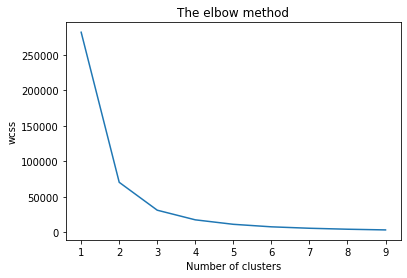

In [36]:
# Finding the optimum number of clusters for k-means classification
x = mydata.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1,10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') # Within cluster sum of squares
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

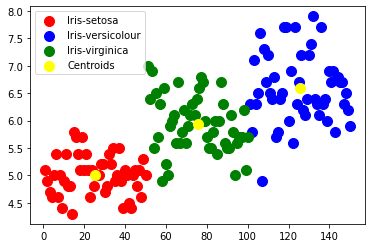

In [38]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [40]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
x_scaled=norm.fit_transform(X_ind)

In [41]:
kmeans_cluster_elbow=KMeans(3)

In [42]:
kmeans_cluster_elbow.fit(x_scaled)

KMeans(n_clusters=3)

cluster_new=mydata.copy()

In [44]:
cluster_new=mydata.copy()

In [45]:
cluster_new["km_eb"]=kmeans_cluster_elbow.predict(x_scaled)

In [46]:
cluster_new

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,km_eb
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,0
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,0
148,149,6.2,3.4,5.4,2.3,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


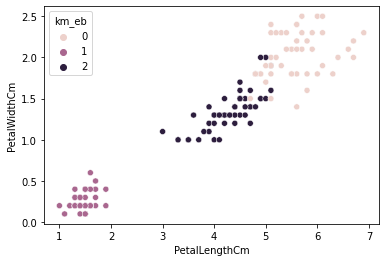

In [47]:
sns.scatterplot(cluster_new["PetalLengthCm"],cluster_new['PetalWidthCm'],hue='km_eb',data=cluster_new)

#Silhouette Method

In [48]:
from sklearn.metrics import silhouette_score

In [54]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(x_scaled)
    cluster_label=kmeans.labels_
    silhouette_avg=silhouette_score(x_scaled,cluster_label)
    print("n_cluster={0},the silhouette_score {1}".format(i,silhouette_avg))

n_cluster=3,the silhouette_score 0.452949780355554
n_cluster=4,the silhouette_score 0.40728293227535856
n_cluster=5,the silhouette_score 0.30444162599253616
n_cluster=6,the silhouette_score 0.332209977002373
n_cluster=7,the silhouette_score 0.33539008396615366
n_cluster=8,the silhouette_score 0.32830238609701967
n_cluster=9,the silhouette_score 0.2972279356138287


In [50]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 7.8 MB/s 


In [51]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

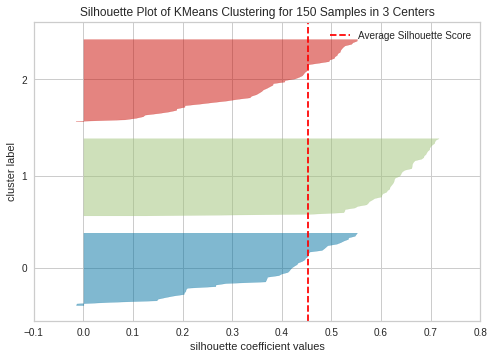

In [55]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(x_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#By using Elbow and Silhouette method we can find the Optimum Cluster for iris dataset is 3